## B1: Population initialization (Khởi tạo quần thể)

In [1]:
import random 
import matplotlib.pyplot as plt


n = 20 #số lượng cá thể (chromosome)
m = 10 #số lượng quần thể (population)
n_generations = 40 #số lượng thế hệ tiến hóa

fitnesses = [] # dùng để vẽ biểu đồ quá trình tối ưu

def generate_random_value(): 
    return random.randint(0,1)

def create_individual():
    return [generate_random_value() for _ in range(n)]

population = [create_individual() for _ in range(m)]

for ind in population:
    print(ind)

[1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
[0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]
[1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
[0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]
[1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1]
[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1]
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1]
[0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]
[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0]


## B2: Evaluation (Ước lượng giá trị)


Bước này tính toán giá trị fitness của từng chromosome(individual - cá thể)thông qua hàm cấp sẵn. Với bài toán one-max là hàm secret(). GA không biết nội dung hàm secret() mà chỉ biết input và output.

In [2]:
#fitness(score) của một vector bằng tổng giá trị các phần tử của vecto
def compute_fitness(individual):
    return sum(gen for gen in individual)

## B3: Selection(Chọn lựa)


Dựa vào giá trị fitness mỗi chromosome, chọn ra những chromosome có giá trị tốt nhất. Nguyên tắc chọn là chromosome nào có giá trị fitness càng cao thì càng được chọn nhiều lần. Trong bài này chúng ta sẽ áp dụng binary selection.
(Binary selection: chọn random ra 2 cá thể và lấy cá thể có fitness lớn hơn đưa vào population mới.

In [3]:
def selection(sorted_old_population):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break
    individual_s = sorted_old_population[index1]
    if( index1 < index2):
        individual_s = sorted_old_population[index2]
    
    return individual_s

## B4: Crossover (lai ghép)

Crossover lai ghép 2 chromosome với nhau. Bài này chúng ta dùng binary crossover. Cho trước tỉ lệ lai ghép là 0.9. Ta sẽ tiến hành crossover tại tất cả các vị trí index. Nếu crossover thành công thì 2 chromosome đổi chỗ vị trí index đó cho nhau.  

In [4]:
import matplotlib.pyplot as plt

def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
            
    return individual1_new, individual2_new

## B5: Mutation (đột biến)

Mutation nhằm đột biến gen cho một cá thể. Chúng ta thực hiện bằng cách: Gen cần đột biến sẽ nhận giá trị ngẫu nhiên trong miền giá trị. Những vị trí đột biến sẽ được sinh random theo một khả năng mutation cho trước. 

In [5]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
            
    return individual_m

BEST:  13
[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1]
[1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0]
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]
[1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1]
[0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0]
[1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0]
[0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1]
[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1]
[0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1]
BEST:  14
[0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]
[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0]
[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0]
[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
[1, 

ValueError: x and y must have same first dimension, but have shapes (40,) and (2,)

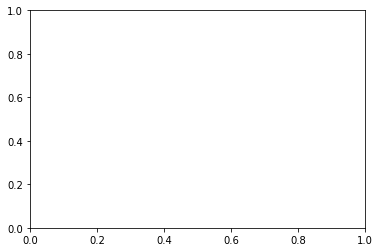

In [6]:
def create_new_population(old_population, elitism=2, gen=1):
    sorted_population = sorted(old_population, key=compute_fitness)
    
    if gen%1==0: #in kết quả fitness 
        fitnesses.append(compute_fitness(sorted_population[m-1]))
        print("BEST: ", compute_fitness(sorted_population[m-1]))
    
    new_population = []
    while len(new_population) < m-elitism:
        #selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population)
        
        #crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        #mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        new_population.append(individual_m1)
        new_population.append(individual_m2)
    
    for ind in sorted_population[m-elitism:]: 
        #Do có thể chromosome tốt nhất 
        #hiện tại có thể mất đi qua quá trình crossover và mutation. 
        #Do đó copy qua để đảm bảo nó không bị mất
        new_population.append(ind.copy())
        
    for ind in new_population:
        print(ind)
    return new_population

population = [create_individual() for _ in range(m)]
for i in range(n_generations):
    population = create_new_population(population, 2, i)
    
y = [i for i in range(n_generations)]
plt.plot(y, fitnesses)
plt.show()    